In [83]:
import pandas as pd
import numpy as np

## Load Dataset

In [86]:
df = pd.read_csv("F:/Portofolio/Analytics-Showcase/ChocolateSales/Data/Raw Data/Chocolate Sales.csv")

In [88]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


### Kesimpulan
- Country & Product perlu diketahui konsistensi katanya, agar sesuai
- Mengubah tipe data Amount & Date dari object ke format yang sesuai

## Data Cleaning & Preprocessing

In [94]:
#Mengubah format date agar sesuai ketika di import ke PostgreSQL

df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y" ).dt.strftime("%Y-%m-%d")

In [96]:
#Mengetahui apakah ada duplicate data ?
df.duplicated().sum()

0

In [98]:
#Mengetahui konsistensi kata pada Dataset
for col in ["Country", "Product"]:
    print(col, ":", df[col].unique())

Country : ['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']
Product : ['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']


In [100]:
#Mengubah tipe data sesuai format

#Amount
df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)

#Date
df["Date"] = pd.to_datetime(df["Date"])

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20124\3477371116.py:4: SyntaxWarning: invalid escape sequence '\$'
  df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)


In [102]:
print(df[df['Amount'] < 0])  # Harus kosong
print(df[df['Boxes Shipped'] < 0])

Empty DataFrame
Columns: [Sales Person, Country, Product, Date, Amount, Boxes Shipped]
Index: []
Empty DataFrame
Columns: [Sales Person, Country, Product, Date, Amount, Boxes Shipped]
Index: []


## Explanatory Data Analysis

In [105]:
#Summary Stats
df["Boxes Shipped"].describe()

count    1094.000000
mean      161.797989
std       121.544145
min         1.000000
25%        70.000000
50%       135.000000
75%       228.750000
max       709.000000
Name: Boxes Shipped, dtype: float64

In [107]:
#Summary Stats
df["Amount"].describe()

count     1094.000000
mean      5652.308044
std       4102.442014
min          7.000000
25%       2390.500000
50%       4868.500000
75%       8027.250000
max      22050.000000
Name: Amount, dtype: float64

In [109]:
#Mengetahui frekuensi distribusi dari product
df['Product'].value_counts()

Product
50% Dark Bites          60
Eclairs                 60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
After Nines             50
85% Dark Bars           50
Fruit & Nut Bars        50
Milk Bars               49
Peanut Butter Cubes     49
99% Dark & Pure         49
Almond Choco            48
Raspberry Choco         48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64

In [111]:
#Mengetahui frekuensi distribusi dari berbagai negara
df['Country'].value_counts()

Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64

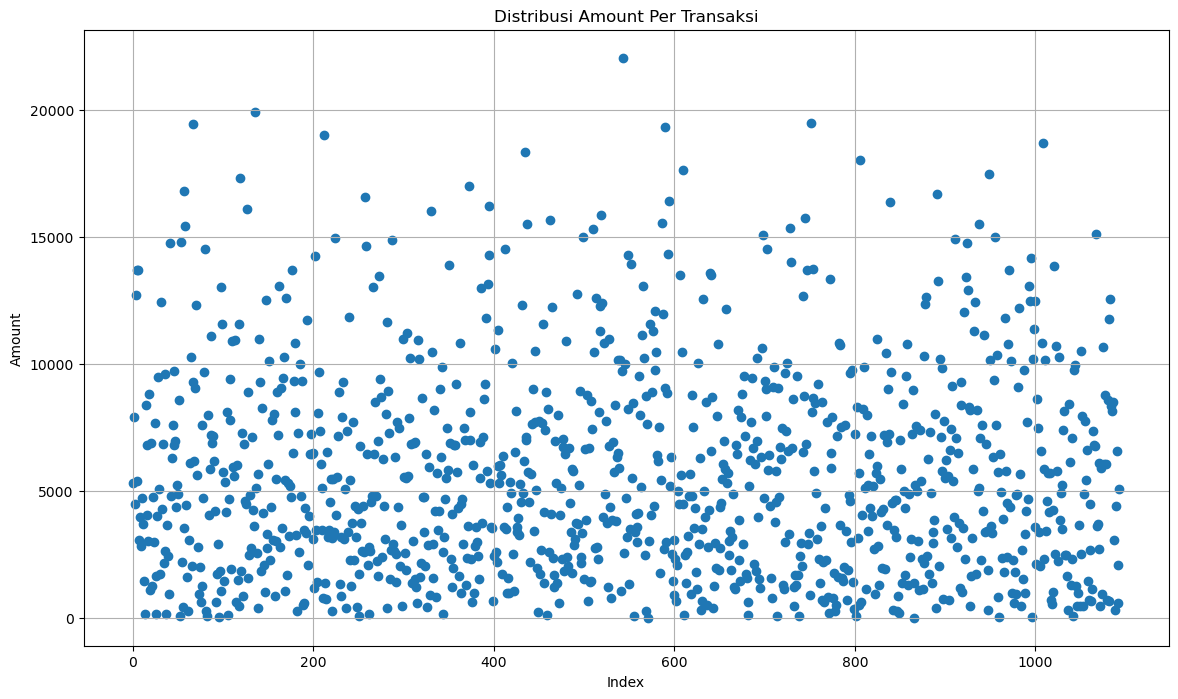

In [113]:
#Melihat distribusi angka dari amount

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(df.index, df["Amount"])
plt.title("Distribusi Amount Per Transaksi")
plt.xlabel("Index")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

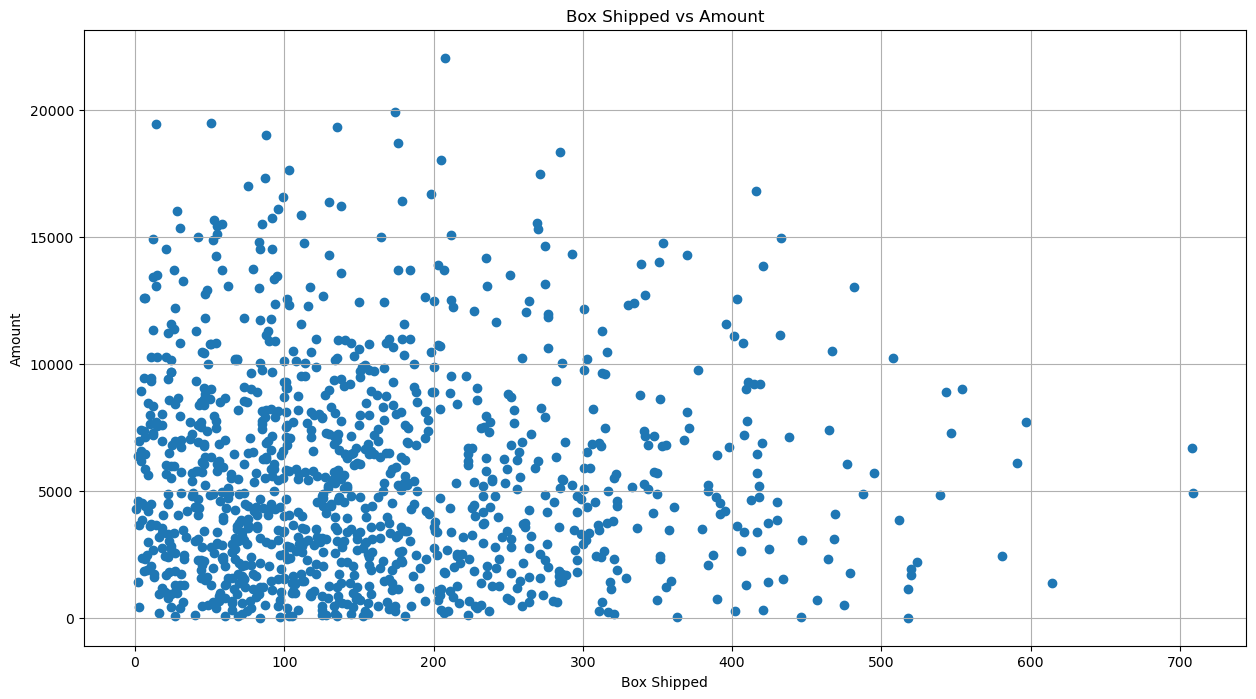

In [114]:
#Melihat pengaruh semakin besar pengiriman apakah semakin besar juga pendapatan ?
plt.figure(figsize=(15, 8))
plt.scatter(df["Boxes Shipped"], df["Amount"])
plt.title("Box Shipped vs Amount")
plt.ylabel("Amount")
plt.xlabel("Box Shipped")
plt.grid(True)
plt.show()

## Save To CSV as Cleaned Data

In [118]:
import os
print(os.getcwd()) #Mengetahui lokasi path dari notebook sekarang

F:\Portofolio\Analytics-Showcase\ChocolateSales\Notebooks


In [120]:
df.to_csv("../Data/ProcessedData/chocolate_sales_cleaned.csv", index=False)